## Take Home Challenge #2

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [130]:
cd relax_challenge

[Errno 2] No such file or directory: 'relax_challenge'
/Users/kellipeluso/Downloads/relax_challenge


In [131]:
user_df = pd.read_csv(r'takehome_users.csv', encoding = 'latin1')
engagement_df = pd.read_csv(r'takehome_user_engagement.csv', encoding = 'latin1')

In [132]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [133]:
user_df.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [134]:
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [135]:
engagement_df.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [136]:
#adjust time features
engagement_df['time_stamp'] = pd.to_datetime(engagement_df['time_stamp'])
engagement_df['time_stamp'] = engagement_df['time_stamp'].dt.floor('d').astype(np.int64)
engagement_df = engagement_df.sort_values(['user_id', 'time_stamp']).drop_duplicates()

#identify adopted users
times = engagement_df.groupby('user_id')['time_stamp'].rolling(window=3)
days = pd.to_timedelta((times.max()- times.min())).dt.days
add = days[days == 7].index.get_level_values('user_id').tolist()
#Remove duplicate users
adopted_users = list(set(add))

In [137]:
user_df['adopted_user'] = user_df.object_id.isin(adopted_users)
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [138]:
#check for null values
user_df.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                     0
dtype: int64

In [139]:
#create column for invited users
invited = pd.DataFrame(user_df.invited_by_user_id.value_counts()).reset_index()
invited.columns=['object_id', 'referrals']
user_df = user_df.merge(invited, how='left', on='object_id')
user_df['referrals'] = user_df['referrals'].fillna(0)

In [154]:
#explore adopted users by date columns
user_df['creation_time'] = pd.to_datetime(user_df['creation_time'])
user_df['create_month'] = user_df['creation_time'].dt.month_name()
user_df['create_day'] = user_df['creation_time'].dt.day_name()
user_df['create_year'] = user_df['creation_time'].dt.year

In [155]:
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,referrals,create_month,create_day,create_year
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,0.0,April,Tuesday,2014
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,0.0,November,Friday,2013
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,1.0,March,Tuesday,2013
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,0.0,May,Tuesday,2013
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,0.0,January,Thursday,2013


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

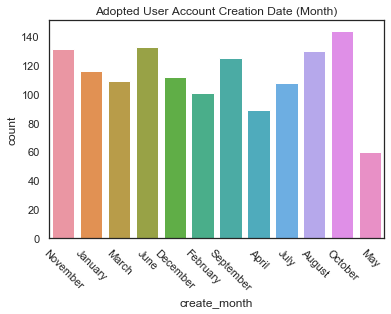

In [160]:
#count plot for creation month distribution
sns.countplot(x='create_month', data=user_df[user_df['adopted_user']==True]).set_title('Adopted User Account Creation Date (Month)')
plt.xticks(rotation=-45)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

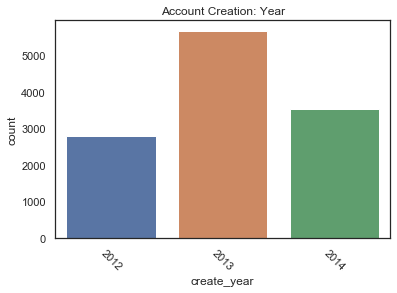

In [165]:
#explore account creation year
sns.countplot(x='create_year', data=user_df).set_title('Account Creation: Year')
plt.xticks(rotation=-45)

In [142]:
#explore creation source
user_df.creation_source.value_counts(1)

ORG_INVITE            0.354500
GUEST_INVITE          0.180250
PERSONAL_PROJECTS     0.175917
SIGNUP                0.173917
SIGNUP_GOOGLE_AUTH    0.115417
Name: creation_source, dtype: float64

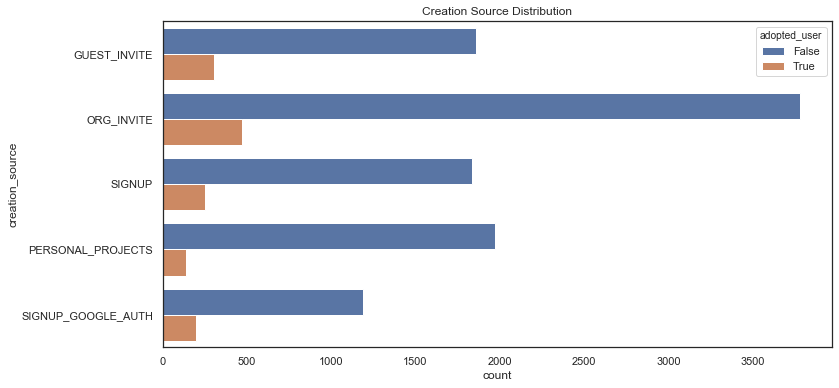

In [144]:
f, ax = plt.subplots(figsize=(12, 6))
sns.countplot(y="creation_source", hue='adopted_user', data=user_df).set_title('Creation Source Distribution');

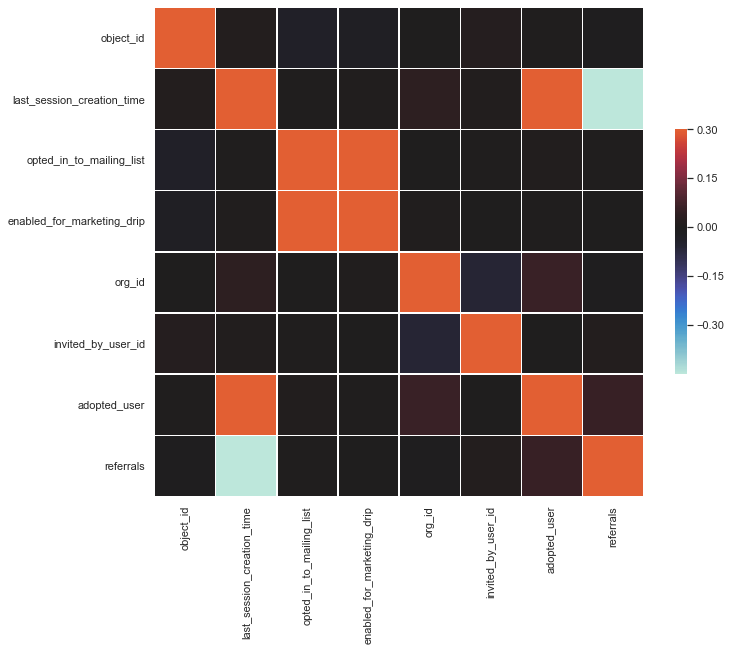

In [140]:
#plot correlation matrix
sns.set(style="white")

# Compute the correlation matrix
corr = user_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})